In [1]:
using constants
using types
using Optim
using PyPlot
using data
include("DOSfunctions.jl")
include("userfunctions.jl")
include("propertyfuncs.jl")

kltSA (generic function with 1 method)

In [2]:
Eoff=5.0
Ts=collect(300.0:10.0:800.0)
######################################################################################
##for Liu x=0.6 best fit x=0.635 N=-1.45e20
######################################################################################
numofn=[-1.15e20,-1.42e20,-1.52e20,-1.75e20]#-9.5e19,-1.75e20,-3.0e19,-0.9e20]#Sample 1 -3.0e19, Sample 2 -1.25e20,
numofnn=[1e12,1e12,1e12,1e12]
#Sample 3 -1.75e20, Sample Sb 0.75% -1.03e20, #
xs=[0.635,0.635,0.635,0.635]#collect(0.0:0.01:1.0)
Es=collect(0.0:0.1:3.0)

var0=[Ts[1],xs[1]]

EX3(var)=Eoff#+Egx3(var[1],var[2])
EX1(var)=Ec0(var[2])+EX3(var)
ELH(var)=Eoff-Egx3(var[1],var[2])
EHH(var)=Eoff-Egx3(var[1],var[2])

effMassX1(var)=X1effMass(var[1])*me
effMassX3(var)=0.38*me
effMassLH(var)=-1.0*me
effMassHH(var)=-1.5*me

alphaX1(var)=0.0#EX1(var0)
alphaX3(var)=0.0#EX1(var0)
alphaLH(var)=0.0#EX3(var0)
alphaHH(var)=0.0#EX3(var0)

bandX3=parBandTx(true,1.0,effMassX3(var0),alphaX3(0.0),EX3(var0),[EX3],[effMassX3],[alphaX3],var0)
bandX1=parBandTx(true,1.0,effMassX1(var0),alphaX1(0.0),EX1(var0),[EX1],[effMassX1],[alphaX1],var0)
bandHH=parBandTx(true,1.0,effMassHH(var0),alphaHH(0.0),EHH(var0),[EHH],[effMassHH],[alphaHH],var0)
bandLH=parBandTx(true,1.0,effMassLH(var0),alphaLH(0.0),ELH(var0),[ELH],[effMassLH],[alphaLH],var0)
bndstTx=BandStrucTx([bandLH,bandHH,bandX1,bandX1,bandX1,bandX3,bandX3,bandX3],var0)#

NII=1e12*1e6
#vartau0=[bandC.effMass,Ts[1],Ec(var0),xs[1],Ec(var0),bandC,numofn[1]*1e6,bndstTx,numofnn[1]*1e6,bandV]
vartau0=[bandX3.effMass,Ts[1],EX1(var0),xs[1],EX1(var0),bandX3,numofn[1]*1e6,bndstTx,numofnn[1]*1e6,bandLH]
#var array: var[1]: effMass , var[2]:T, var[3]:E, var[4]:x, var[5]:Ef, 
#var[6]:band, var[7]:NII var[8]:bndst
tauAC(var)=tauAC_func(Cl(var[4]),acPhDa(var[4]),var[2],var[1],var[3],var[6])
tauPOP(var)=tauPOP_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[1]
,var[3],tauPOPIIint(var[5],var[2],var[4],var[6]),var[7],opPhE(var[4]),var[8])
tauPOP2(var)=tauPOP2_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[1],
var[3],opPhE(var[4]))
tauII2(var)=tauII2_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[7],var[1],var[3],var[8])

tauTOTTx=tau_electron_B([tauAC,tauII2,tauPOP2],vartau0)#
tauACs=Array{Float64}(length(Es),length(Ts),length(numofn))
tauPOPs=Array{Float64}(length(Es),length(Ts),length(numofn))
tauIIs=Array{Float64}(length(Es),length(Ts),length(numofn))
tauTOTs=Array{Float64}(length(Es),length(Ts),length(numofn))

numofnsout=Array{Float64}(length(Ts),length(numofn))
numofnsoutn=Array{Float64}(length(Ts),length(numofn),length(bndstTx.bands))
numofnsoutp=Array{Float64}(length(Ts),length(numofn),length(bndstTx.bands))

xmax=3.0
sigmas=Array{Float64}(length(Ts),length(numofn))
seebecks=Array{Float64}(length(Ts),length(numofn))
Efs=Array{Float64}(length(Ts),length(numofn))
#@time (sigmas,seebecks)=sigmaArray(bndstTx,Ts,xs,numofn,tauTOTTx,xmax)
x=3.0

3.0

In [3]:
@time (Efs,sigmas,seebecks,kes,kees,kehs,kbis)=electronicPropsiso(bndstTx,xs,Ts,numofn,numofnn,tauTOTTx,xmax)

 43.101731 seconds (286.97 M allocations: 22.354 GiB, 4.21% gc time)


([5.06713 0.0 2.04175e-316 1.12587e-316; 5.06613 0.0 2.42092e-322 0.0; … ; 4.99106 0.0 5.80653e-316 6.90808e-310; 4.98951 0.0 6.90808e-310 1.12585e-316]

[0.0 5.07774 0.0 9.53547e-322; 4.24632e-314 5.07684 2.66472e-316 5.71806e-316; … ; 0.0 5.00673 0.0 5.71806e-316; 2.12433e-314 5.00514 4.99425e-316 6.90808e-310]

[1.18171e-316 1.85221e-317 5.08137 4.24399e-314; 0.0 2.37152e-322 5.08049 0.0; … ; 5.71804e-316 6.90808e-310 5.01202 6.90808e-310; 1.0878e243 1.12587e-316 5.01042 1.12587e-316]

[0.0 1.12585e-316 6.90808e-310 5.08923; 4.24399e-314 0.0 1.12587e-316 5.08841; … ; 4.99979e-316 4.98858e-316 5.74738e-316 5.02332; 6.90808e-310 2.59943e-316 6.90808e-310 5.02172], [1.54776e5 6.17088e-321 4.98079e-316 7.16395e-322; 1.50334e5 4.99529e-316 0.0 4.94025e-316; … ; 53957.1 0.0 0.0 1.0878e243; 53496.6 0.0 2.0418e-316 1.62619e-317]

[0.0 1.8466e5 0.0 1.12585e-316; 4.79393e-316 1.79471e5 0.0 0.0; … ; 4.98079e-316 64017.3 4.82977e-316 6.90808e-310; 0.0 63292.6 6.90808e-310 1.12585e-316]

[0.0 0.

In [4]:
Efs

51×4×4 Array{Float64,3}:
[:, :, 1] =
 5.06713  0.0           2.04175e-316  1.12587e-316
 5.06613  0.0           2.42092e-322  0.0         
 5.06509  0.0           4.8263e-316   4.24399e-314
 5.06402  0.0           5.29185e-316  0.0         
 5.06293  5.71792e-316  1.0878e243    0.0         
 5.0618   0.0           4.65813e-315  0.0         
 5.06065  5.71792e-316  1.89721e-321  4.84045e-316
 5.05946  5.74785e-316  6.32404e-322  1.42291e-321
 5.05825  2.13768e-316  0.0           6.32404e-322
 5.05701  5.71791e-316  0.0           4.83954e-316
 5.05574  3.289e-320    4.99369e-316  0.0         
 5.05444  4.67967e-316  0.0           4.83956e-316
 5.05312  4.82805e-316  0.0           0.0         
 ⋮                                                
 5.00851  1.18576e-321  1.63042e-322  1.0878e243  
 5.00667  4.74303e-322  4.98082e-316  4.07854e-315
 5.00484  4.98795e-316  5.74785e-316  2.76677e-321
 5.00303  0.0           7.90505e-322  6.32404e-322
 5.00123  4.82615e-316  6.32404e-322  4.67967

In [5]:
sigmas

51×4×4 Array{Float64,3}:
[:, :, 1] =
     1.54776e5  6.17088e-321  4.98079e-316  7.16395e-322
     1.50334e5  4.99529e-316  0.0           4.94025e-316
     1.46068e5  5.71851e-316  1.50196e-321  6.90808e-310
     1.4197e5   0.0           5.53354e-322  1.0878e243  
     1.38032e5  0.0           4.79672e-316  4.24302e-315
     1.34246e5  0.0           0.0           2.37152e-322
     1.30605e5  2.75635e-316  5.35259e-316  4.74303e-322
     1.27102e5  6.90808e-310  6.90808e-310  4.98177e-316
     1.23731e5  1.12587e-316  1.18171e-316  0.0         
     1.20485e5  0.0           0.0           4.9819e-316 
     1.1736e5   4.24399e-314  2.122e-314    6.90808e-310
     1.14348e5  0.0           0.0           1.18171e-316
     1.11446e5  0.0           0.0           0.0         
     ⋮                                                  
 61769.3        4.63455e-316  4.74303e-322  1.12587e-316
 60739.6        4.98186e-316  2.0309e-316   0.0         
 59762.5        0.0           0.0           2.122e-

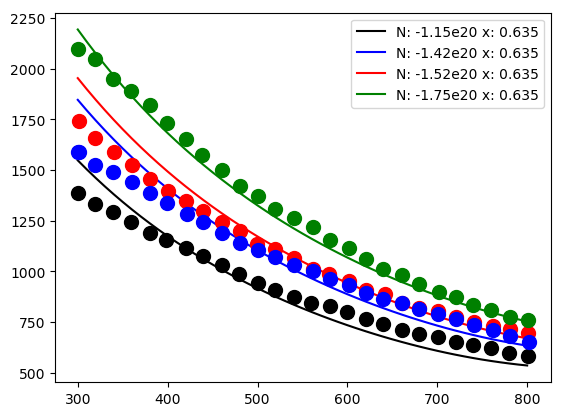

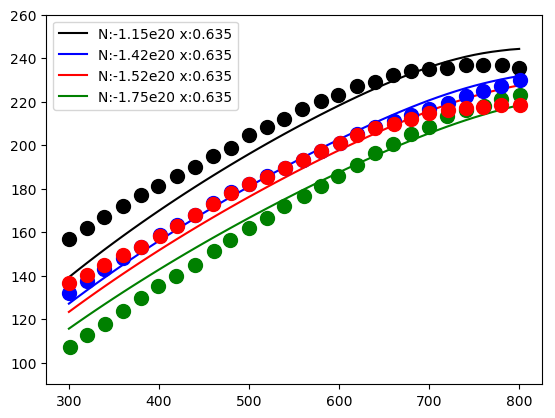

PyObject <matplotlib.legend.Legend object at 0x7f2a5d959438>

In [7]:
colors=["k","b","r","g","m","y","c"]
plots=Array{Any}(length(numofn)*length(xs))
figure()
k=1
for p in 1:1:length(numofn)
    q=p
    #for q in 1:1:length(xs)                
        plot(Ts,sigmas[:,p,q]/100,linestyle="-",color=colors[mod(k,length(colors))]
        ,label=string("N: $(numofn[p]) x: $(xs[q])"))
        k+=1
        #push!(plots,p)       
   # end
end

plot(LMg2SiSn04TE,LMg2SiSn04E, linestyle="None",marker=".",markersize=20,color="k")
plot(LMg2SiSn07TE,LMg2SiSn07E, linestyle="None",marker=".",markersize=20,color="r")
plot(LMg2SiSn06TE,LMg2SiSn06E, linestyle="None",marker=".",markersize=20,color="b")
plot(LMg2SiSn08TE,LMg2SiSn08E, linestyle="None",marker=".",markersize=20,color="g")
#ylim(400,2200)
legend()
figure()
k=1
for p in 1:1:length(numofn)
    q=p
    #for q in 1:1:length(xs)
        plot(Ts,-1e6*seebecks[:,p,q],color=colors[mod(k,length(colors))]
        ,label=string("N:$(numofn[p]) x:$(xs[q])")) 
        k+=1
    #end
end
plot(LMg2SiSn04TS,LMg2SiSn04S, linestyle="None",marker=".",markersize=20,color="g")
plot(LMg2SiSn07TS,LMg2SiSn07S, linestyle="None",marker=".",markersize=20,color="k")
plot(LMg2SiSn06TS,LMg2SiSn06S, linestyle="None",marker=".",markersize=20,color="b")
plot(LMg2SiSn08TS,LMg2SiSn08S, linestyle="None",marker=".",markersize=20,color="r")
ylim(90,260)
legend(loc="upper left")